# Фильтрация

In [2]:
import pandas as pd
import numpy as np

In [3]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [5]:
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
students_performance.gender == 'female'

0       True
1       True
2       True
3      False
4      False
       ...  
995     True
996    False
997     True
998     True
999     True
Name: gender, Length: 1000, dtype: bool

In [9]:
students_performance.loc[students_performance.gender == 'female', ['gender', 'writing score']]

,gender,writing score
0,female,74
1,female,88
2,female,93
5,female,78
6,female,92
...,...,...
993,female,74
995,female,95
997,female,65
998,female,77


In [12]:
mean_writing_score = students_performance['writing score'].mean()

In [16]:
students_performance.loc[students_performance['writing score'] > mean_writing_score]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [20]:
(students_performance['writing score'] > mean_writing_score) & (students_performance.gender == 'female')

0       True
1       True
2       True
3      False
4      False
       ...  
995     True
996    False
997    False
998     True
999     True
Length: 1000, dtype: bool

In [18]:
query = (students_performance['writing score'] > mean_writing_score) & (students_performance.gender == 'female')

In [21]:
students_performance.loc[query]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


# Задание 1.

### У какой доли студентов из датасэта в колонке lunch указано free/reduced?

### Формат ответа десятичная дробь, например, 0.25

In [28]:
(students_performance['lunch'] == 'free/reduced').mean()

0.355

In [29]:
students_performance['lunch'].value_counts(normalize=True)

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64

In [30]:
(students_performance.lunch == 'free/reduced').mean()

0.355

# Задание 2

### Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?

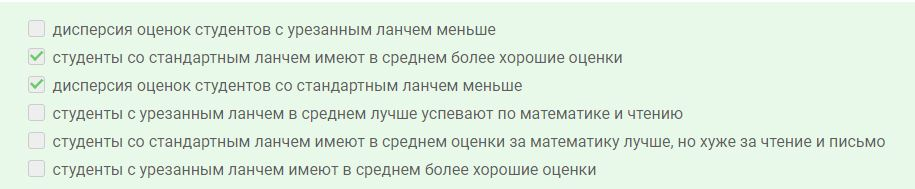

In [46]:
from IPython.display import Image
Image("JupyterFiles/1.JPG", width=800, height=1000)

In [12]:
students_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [32]:
students_performance[students_performance.lunch == 'standard'].var().mean()

194.44151218964166

In [34]:
students_performance[students_performance.lunch == 'free/reduced'].var().mean()

229.9660963900162

In [38]:
students_performance[(students_performance.lunch == 'standard')].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [39]:
students_performance[(students_performance.lunch == 'free/reduced')].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [44]:
students_performance[(students_performance.lunch == 'standard')].describe().loc['mean'].mean()

70.83720930232558

In [45]:
students_performance[(students_performance.lunch == 'free/reduced')].describe().loc['mean'].mean()

62.19906103286385

In [50]:
students_performance.groupby('lunch').agg(['mean', 'var'])

math score             reading score             writing score  \
                   mean         var          mean         var          mean   
lunch                                                                         
free/reduced  58.921127  229.824270     64.653521  221.871139     63.022535   
standard      70.034109  186.418089     71.654264  191.285560     70.823256   

                          
                     var  
lunch                     
free/reduced  238.202881  
standard      205.620887

## конец

## Изменение названий колонок вручную

In [ ]:
students_performance = students_performance\
                                    .rename(columns=
                                            {'parental level of education': 'parental_level_of_education',
                                            'test preparation course': 'test_preparation_course',
                                            'math score': 'math_score',
                                            'reading score': 'reading_score',
                                            'writing score': 'writing_score'})

In [51]:
students_performance.columns = [column.replace(" ", "_") for column in students_performance.columns]

#### можно так:  students_performance.columns = students_performance.columns.str.replace(" ", "_")

In [52]:
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [56]:
students_performance.query("writing_score > 74")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [59]:
students_performance.query("gender == 'female' & writing_score > 78")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
36,female,group D,associate's degree,standard,none,74,81,83
38,female,group D,associate's degree,free/reduced,completed,75,90,88
...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91
984,female,group C,some high school,standard,none,74,75,82
989,female,group D,some college,free/reduced,completed,67,86,83
995,female,group E,master's degree,standard,completed,88,99,95


## Экранирование переменной для запроса:

In [60]:
writing_score_query = 78

In [61]:
students_performance.query("writing_score > @writing_score_query")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91
984,female,group C,some high school,standard,none,74,75,82
989,female,group D,some college,free/reduced,completed,67,86,83
995,female,group E,master's degree,standard,completed,88,99,95


## .isin()

In [66]:
students_performance[students_performance.parental_level_of_education.isin(["bachelor's degree", "master's degree"])]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
14,female,group A,master's degree,standard,none,50,53,58
18,male,group C,master's degree,free/reduced,completed,46,42,46
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100
969,female,group B,bachelor's degree,standard,none,75,84,80
970,female,group D,bachelor's degree,standard,none,89,100,100
993,female,group D,bachelor's degree,free/reduced,none,62,72,74


## Фильтрация колонок

### "ручной способ":

In [70]:
score_columns = [i for i in list(students_performance) if 'score' in i]

In [71]:
students_performance[score_columns]

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


### черех filter:

In [72]:
students_performance.filter(like='score')

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


### фильтрация по столбцу (axis = 1 по заголовкам)

In [74]:
students_performance.filter(like='6', axis=0)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
26,male,group B,some college,standard,none,69,54,55
36,female,group D,associate's degree,standard,none,74,81,83
46,female,group A,associate's degree,standard,completed,55,65,62
...,...,...,...,...,...,...,...,...
968,female,group E,associate's degree,standard,none,68,76,67
969,female,group B,bachelor's degree,standard,none,75,84,80
976,male,group B,some college,free/reduced,completed,60,62,60
986,female,group C,associate's degree,standard,none,40,59,51
